In [60]:
#This was a function of integration that was built and I extracted to help me solve for the integration of Heat capacity.
import numpy as np
def gaussxw(N):

    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    epsilon = 1*10**-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

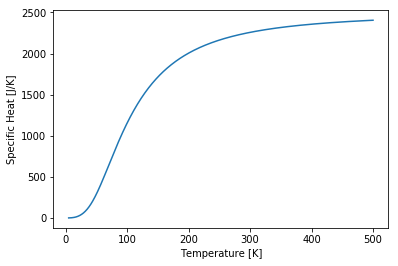

2163.8221970015443

In [67]:
# Houman Alizadeh
# Homework Lecture 6
import matplotlib . pyplot as plt
import numpy as np

def Integrand(x):
    return x**4*exp(x)/(exp(x)-1)**2
def Heat_Capacity(T):
    Volume = 1*10**-3
    Rho = 6.022*10**28 
    k_B = 1.38065*10**-23 
    theta_D = 428
    Constant = 9*Volume*Rho*k_B*(T/theta_D)**3
    a, b = 0.,theta_D/T
    x_a ,y_b = gaussxwab(200,a,b)
    # gaussxwab is the function defined on the first line
    total = 0.
    for k in range(200) :
        total += y_b[k] * Integrand(x_a[k])
    return Constant * total
T = linspace(5,500,496)
Result = [ ]
for i in range(496):
    Result.append(Heat_Capacity(T[i]))
plt.plot(T,Result)
plt.xlabel('Temperature [K]')
plt.ylabel('Specific Heat [J/K]')
plt.show()
Heat_Capacity(250)